<center><h1>Wojciech Sałapatek grupa 2b</h1></center>

***Zad1***

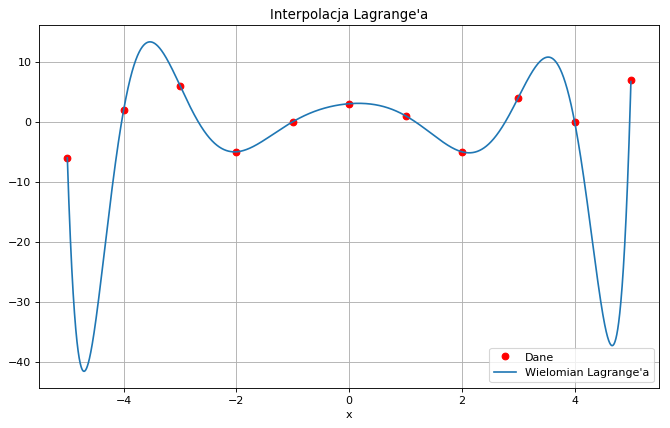

In [2]:
from random import randint
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.interpolate as sc
import scipy.optimize as opt

def Li(args, vals, i, x):
    product = 1
    for k in [(x - args[j])/(args[i] - args[j]) for j in range(len(args)) if j != i]:
        product *= k
    return product
    

def lagrange_polynomial(args, vals):
    def calculate(x):
        return sum([Li(args, vals, i, x)*vals[i] for i in range(len(vals))])
    return calculate

#Do  rysowania
def draw_with_data(darg, dval ,arg, vals, title, lbl):
    fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    plot = fig.add_subplot(111)
    plot2 = fig.add_subplot(111)
    plt.title(title)
    plot.plot(darg, dval, 'ro', label="Dane")
    plot2.plot(arg, vals, label=lbl)
    plt.legend()
    plt.xlabel("x")
    plot.grid(True)
    plt.show()
    
arguments = [i for i in range(-5, 6)]
values = [randint(-7, 7) for i in range(11)]

f = lagrange_polynomial(arguments, values)

args = np.arange(-5, 5, 1/1024)
vals = [f(i) for i in args]

draw_with_data(arguments, values, args, vals, "Interpolacja Lagrange'a", "Wielomian Lagrange'a")




***Zad2***

Obserwujemy tutaj efekt Rungego. Dla wielu równoodległych węzłów wielomian interpolacyjny silnie oscyluje w pobliżu punków krańcowych. Im większa liczba węzłów tym efekt ten jest mocniejszy. Związane jest to z fatem iż im większy stopień wielomianu tym szybciej "chce" uciec do nieskonczoności, jednakże musi on przejść przez ustalone węzły dlatego mocno oscyluje. Rozwiązaniem tego problemu jest zastosowanie do interpolacji węzłów Czebyszewa, które są gęściej rozsiane na krańcach przedziału. Dla interpolacji funkcjami sklejanymi lepszy efekt dają równoodległe punkty.

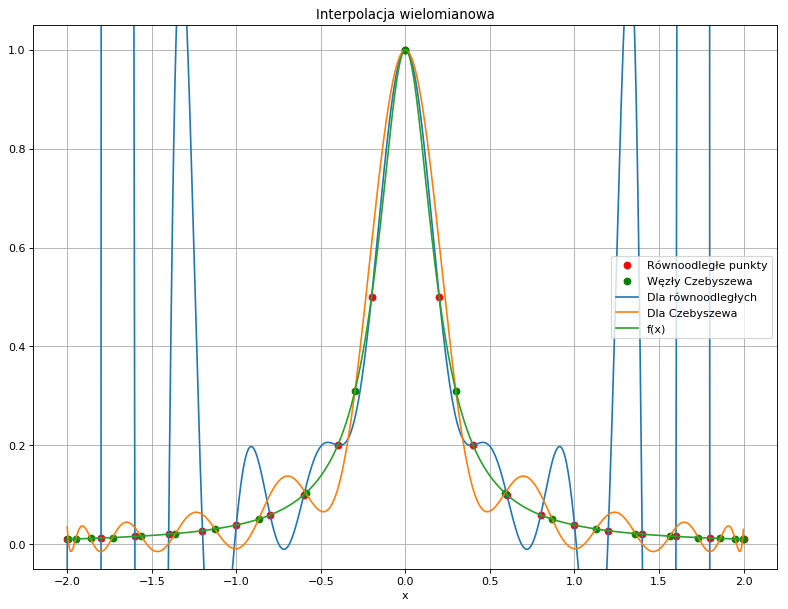

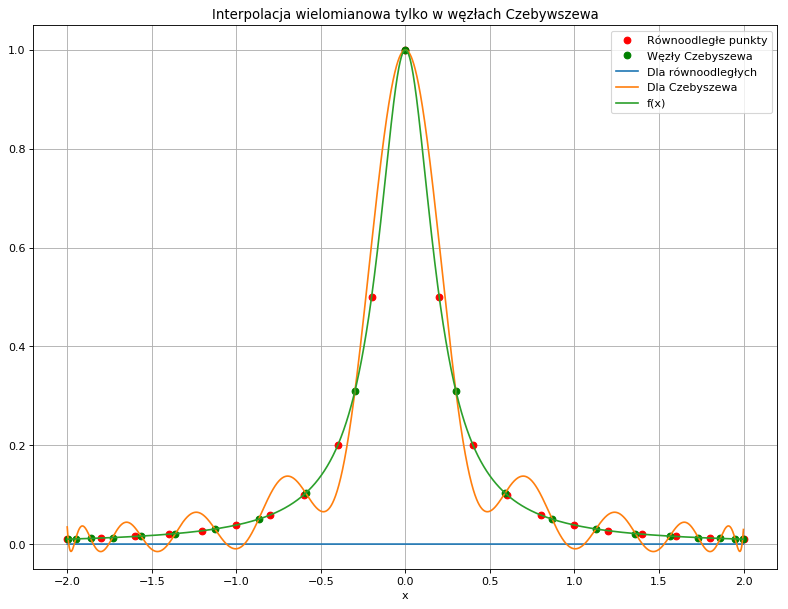

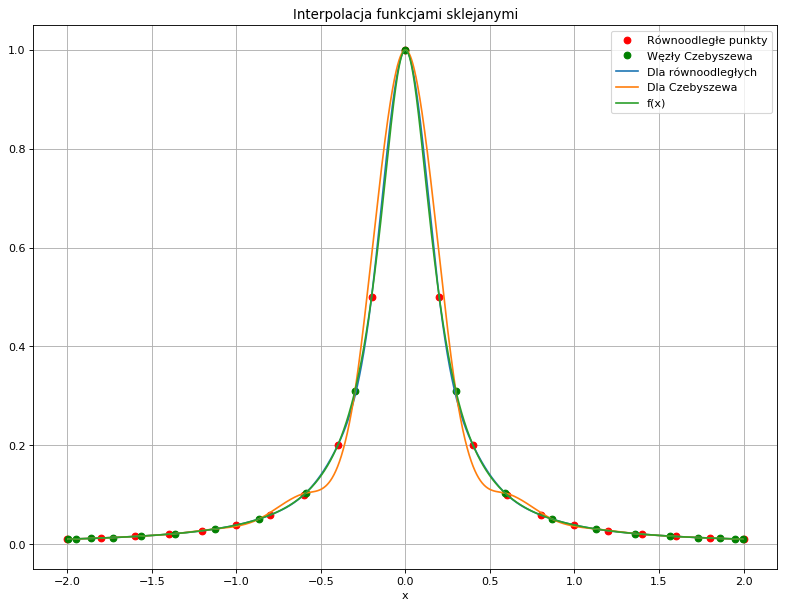

In [3]:
f = lambda x: 1/(25*x**2 + 1)

def poly_f (x, arguments, values, n):
    result = 0;
    
    for i in range(0, len(coef)):
        result += coef[i]*x**(len(coef)-i-1)
    return result
    
def draw(args1, vals1, args2, vals2, title): 
    fig = plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
    plot = fig.add_subplot(111)
    plot1 = fig.add_subplot(111)
    plot2 = fig.add_subplot(111)
    plot3 = fig.add_subplot(111)
    plot4 = fig.add_subplot(111)
    plot3.set(ylim=(-0.05,1.05))
    plt.title(title)
    plot.plot(dargs, dvals, 'ro', label="Równoodległe punkty")
    plot.plot(cargs, cvals, 'go', label="Węzły Czebyszewa")
    plot2.plot(args1, vals1, label="Dla równoodległych")
    plot3.plot(args2, vals2, label="Dla Czebyszewa")
    plot3.plot(args1, [f(i) for i in args1], label="f(x)")
    plot.legend()
    plt.xlabel("x")
    plot.grid(True)
    plt.show()    
    
    
dargs = [-2+i*(1/5) for i in range(21)]
cargs = np.array([math.cos((2*i - 1)*math.pi/(2*21)) for i in range(1, 22)])*(2+2)*0.5 + 0.5*(2-2)
cargs.sort()
dvals = [f(i) for i in dargs]
cvals = [f(i) for i in cargs]

args = np.arange(-2, 2, 1/1024)
coeff = np.polyfit(dargs, dvals, 20)
vals1 = [np.polyval(coeff, i) for i in args]
coeff = np.polyfit(cargs, cvals, 20)
vals2 = [np.polyval(coeff, i) for i in args]

draw(args, vals1, args, vals2, "Interpolacja wielomianowa")
draw(args, [0]*4096, args, vals2, "Interpolacja wielomianowa tylko w węzłach Czebywszewa")

fd = sc.interp1d(dargs, dvals, kind="cubic")
fc = sc.interp1d(cargs, cvals, kind="cubic")

args = np.arange(min(cargs), max(cargs), 1/1024)
vals1 = [fd(i) for i in args]
vals2 = [fc(i) for i in args]

draw(args, vals1, args, vals2, "Interpolacja funkcjami sklejanymi")




***Zad3***

Z powodu efektu Rungego interpolacja wielomianowa jest bardzo niedokładna na końcach przedziału, Jako, że wartości rpm leżą niemal na jednej prostej(lecz nie idealnie) najlepsze rezultaty daje aproksymacja wielomianem 3 stopnia.

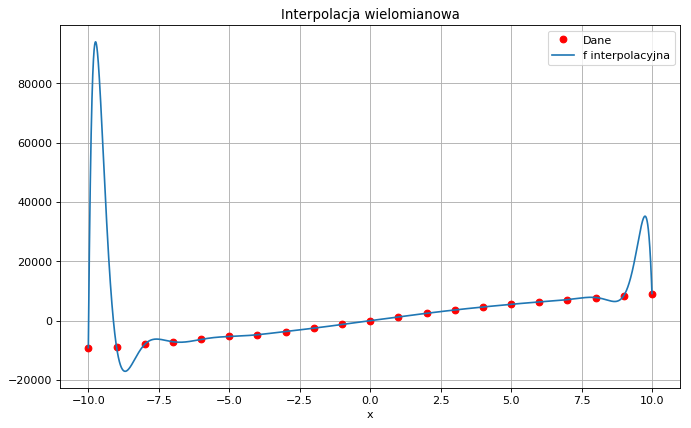

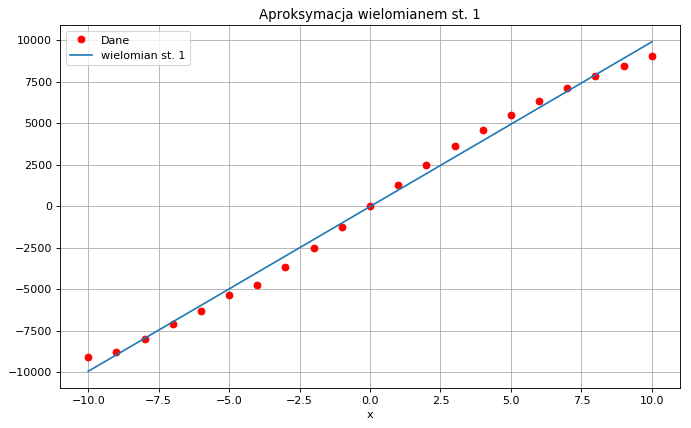

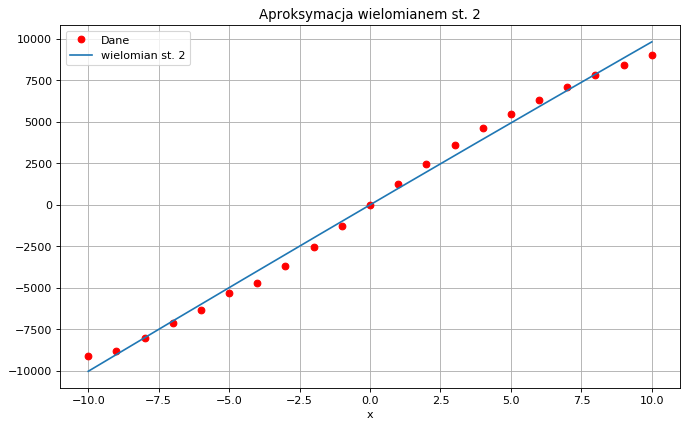

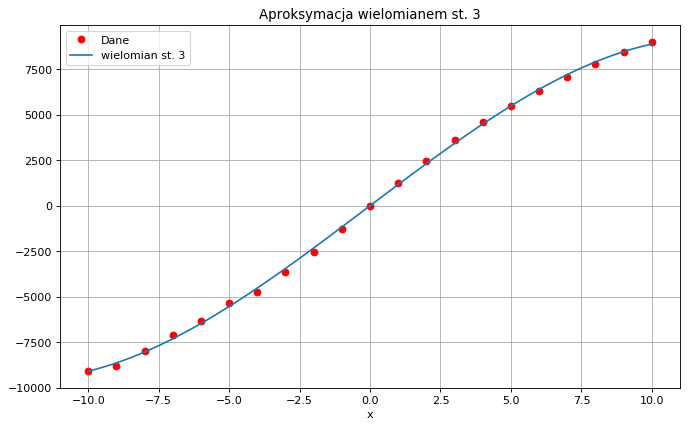

In [58]:
voltage = [i for i in range(-10,11)]

rpm = [-9.1, -8.82, -7.99, -7.10, -6.32, -5.33, -4.73, -3.65, -2.52, -1.28, 0.00, 1.26, 2.49, 3.61, 4.61, 5.51, 6.32, 7.10, 7.81, 8.45, 9.02]
rpm = [i*1000 for i in rpm]
coeff = np.polyfit(voltage, rpm, 20)
coeff1 = np.polyfit(voltage, rpm, 1)
coeff2 = np.polyfit(voltage, rpm, 2)
coeff3 = np.polyfit(voltage, rpm, 3)
    
args = np.arange(-10, 10, 1/2048)
draw_with_data(voltage, rpm, args, [np.polyval(coeff, i) for i in args], "Interpolacja wielomianowa", "f interpolacyjna")
draw_with_data(voltage, rpm, args, [np.polyval(coeff1, i) for i in args], "Aproksymacja wielomianem st. 1", "wielomian st. 1")
draw_with_data(voltage, rpm, args, [np.polyval(coeff2, i) for i in args], "Aproksymacja wielomianem st. 2", "wielomian st. 2")
draw_with_data(voltage, rpm, args, [np.polyval(coeff3, i) for i in args], "Aproksymacja wielomianem st. 3", "wielomian st. 3")



***Zad4***
* Przy pomocy zadanych punktów interpolujemy funkcję drogi od czasu. Interpolacji dokonujemy wielomianem 3 stopnia zatem efekt Rungego nie pogorszy jakości interpolacji.
* Aby obliczyć czas, w którym kierowca minął fotoradar rozwiązujemy równanie: $$f(t) - 79.6=0$$
$$t \approx 2.2758[s]$$
$f(t)$ - otrzymana funkcja interpolująca
* By obliczyć prędkość obliczmy pochodną drogi po czasie
$$v(t)=f^{'}(t)$$
$$v(2.2758) \approx 21.6819 [\frac{m}{s}]$$

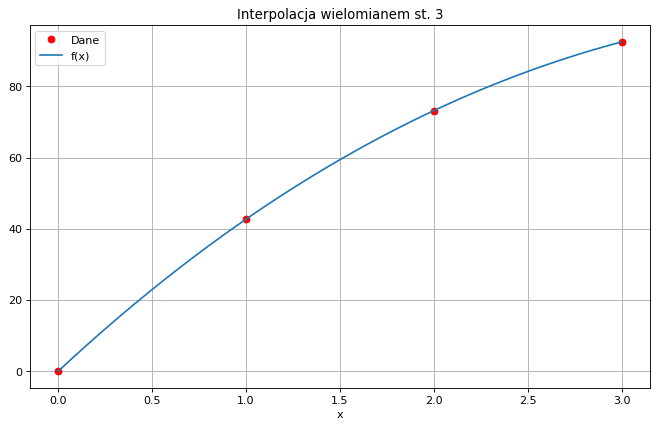

Otrzymana funkcja interpolująca f(t) = 0.16666666666667065t^3 + -6.600000000000016t^2 + 49.13333333333335t + 2.6783516586114557e-14
Obliczony czas minięcia : 2.2758469403061596
Prędkość w chwili minięcia: 21.681893369142486


In [59]:
t = [0, 1, 2, 3]
s = [0, 42.7, 73.2, 92.5]

coeff = np.polyfit(t, s, 3)
args = np.arange(0, 3, 1/512)
draw_with_data(t, s, args, [np.polyval(coeff, i) for i in args], "Interpolacja wielomianem st. 3", "f(x)")
print("Otrzymana funkcja interpolująca f(t) = {}t^3 + {}t^2 + {}t + {}".format(coeff[0], coeff[1], coeff[2], coeff[3]))

def f_p(x, coeff):
    return 3*coeff[0]*x**2 + 2*coeff[1]*x + coeff[2]


def find_time(x):
    return np.polyval(coeff, x) - 79.6 

pass_time = opt.newton(find_time, 2.5)
print("Obliczony czas minięcia : {}".format(pass_time))
print("Prędkość w chwili minięcia: {}".format(f_p(pass_time, coeff)))